##### SHARE A MEAL APP

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##### NGO_DATA

In [2]:
#read in dataset
ngo = pd.read_csv('NGO.csv')
ngo

,ngo_id,location_name,longitude,latitude,urgency_level
0,NGO_3363,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Low
1,NGO_5358,"Ikorodu, Lagos State, Nigeria",3.504127,6.619123,Low
2,NGO_1389,"Enugu South, Enugu State, Nigeria",7.513903,6.400134,High
3,NGO_7737,"Zaria, Kaduna, Nigeria",7.651853,11.024812,Medium
4,NGO_4226,"Enugu East, Enugu State, Nigeria",7.556836,6.548344,High
5,NGO_1589,"Enugu North, Enugu State, Nigeria",7.538321,6.441078,Medium
6,NGO_4445,"Ikeja, Lagos State, Nigeria",3.343281,6.597473,High


##### DATA UNDERSTANDING

In [3]:
#data information
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ngo_id         7 non-null      object 
 1   location_name  7 non-null      object 
 2   longitude      7 non-null      float64
 3   latitude       7 non-null      float64
 4   urgency_level  7 non-null      object 
dtypes: float64(2), object(3)
memory usage: 412.0+ bytes


In [4]:
#summary statistics
ngo.describe()

,longitude,latitude
count,7.000000,7.000000
mean,5.780330,7.159506
std,2.227173,1.706310
min,3.343281,6.400134
25%,3.429059,6.463326
50%,7.513903,6.548344
75%,7.547578,6.608298
max,7.651853,11.024812


In [5]:
#check duplicates
ngo.duplicated().sum()

np.int64(0)

##### SME DATA

In [6]:
#read in data
sme = pd.read_csv('SME.csv')
sme

,sme_id,date,location_name,longitude,latitude,business_type,surplus_meals,hours_since_prepared,storage_type,food_type,food_status
0,SME_6160,2024-01-30,"Enugu South, Enugu State, Nigeria",7.513903,6.400134,Bakery,20,4,Room Temperature,Bread,Moderate
1,SME_6049,2024-01-28,"Ikeja, Lagos State, Nigeria",3.343281,6.597473,Bakery,26,8,Room Temperature,Pastries,Moderate
2,SME_2859,2024-01-13,"Enugu East, Enugu State, Nigeria",7.556836,6.548344,Restaurant,26,11,Refrigerated,Rice,Moderate
3,SME_5987,2024-01-21,"Zaria, Kaduna, Nigeria",7.651853,11.024812,Bakery,24,15,Refrigerated,Rice,Moderate
4,SME_4224,2024-03-11,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,21,24,Refrigerated,Rice,Spoiled
...,...,...,...,...,...,...,...,...,...,...,...
895,SME_6049,2024-03-29,"Ikeja, Lagos State, Nigeria",3.343281,6.597473,Bakery,16,2,Room Temperature,Others,Moderate
896,SME_4224,2024-02-16,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,40,23,Refrigerated,Pastries,Spoiled
897,SME_5691,2024-03-26,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,38,24,Room Temperature,Others,Spoiled
898,SME_6160,2024-01-26,"Enugu South, Enugu State, Nigeria",7.513903,6.400134,Bakery,21,7,Refrigerated,Rice,Fresh


In [7]:
#simulate variability 
np.random.seed(42)
sme['hours_since_prepared'] += np.random.normal(0, 1, size=len(sme))

In [8]:
sme['hours_since_prepared'] = sme['hours_since_prepared'].clip(lower=0)

In [9]:
#add noise randomly to the food status column
noise_per = 0.07            #7% of the data will have labels change
num_noise = int(noise_per * len(sme))

noise_indices = np.random.choice(sme.index, size = num_noise, replace =False)

labels = ['Fresh', 'Moderate', 'Spoiled']

for idx in noise_indices:
    current_label = sme.loc[idx, 'food_status']
    
    new_label = np.random.choice(
        [label for label in labels if label != current_label]
    )
    sme.loc[idx, 'food_status'] = new_label

In [10]:
sme

,sme_id,date,location_name,longitude,latitude,business_type,surplus_meals,hours_since_prepared,storage_type,food_type,food_status
0,SME_6160,2024-01-30,"Enugu South, Enugu State, Nigeria",7.513903,6.400134,Bakery,20,4.496714,Room Temperature,Bread,Moderate
1,SME_6049,2024-01-28,"Ikeja, Lagos State, Nigeria",3.343281,6.597473,Bakery,26,7.861736,Room Temperature,Pastries,Moderate
2,SME_2859,2024-01-13,"Enugu East, Enugu State, Nigeria",7.556836,6.548344,Restaurant,26,11.647689,Refrigerated,Rice,Moderate
3,SME_5987,2024-01-21,"Zaria, Kaduna, Nigeria",7.651853,11.024812,Bakery,24,16.523030,Refrigerated,Rice,Moderate
4,SME_4224,2024-03-11,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,21,23.765847,Refrigerated,Rice,Spoiled
...,...,...,...,...,...,...,...,...,...,...,...
895,SME_6049,2024-03-29,"Ikeja, Lagos State, Nigeria",3.343281,6.597473,Bakery,16,2.648710,Room Temperature,Others,Moderate
896,SME_4224,2024-02-16,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,40,22.832882,Refrigerated,Pastries,Spoiled
897,SME_5691,2024-03-26,"Surulere, Lagos State, Nigeria",3.353991,6.485574,Catering Service,38,24.146714,Room Temperature,Others,Spoiled
898,SME_6160,2024-01-26,"Enugu South, Enugu State, Nigeria",7.513903,6.400134,Bakery,21,8.206509,Refrigerated,Rice,Fresh


##### DATA UNDERSTANDING

In [11]:
#data information
sme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sme_id                900 non-null    object 
 1   date                  900 non-null    object 
 2   location_name         900 non-null    object 
 3   longitude             900 non-null    float64
 4   latitude              900 non-null    float64
 5   business_type         900 non-null    object 
 6   surplus_meals         900 non-null    int64  
 7   hours_since_prepared  900 non-null    float64
 8   storage_type          900 non-null    object 
 9   food_type             900 non-null    object 
 10  food_status           900 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 77.5+ KB


In [12]:
#summary statistics
sme.describe()

,longitude,latitude,surplus_meals,hours_since_prepared
count,900.000000,900.000000,900.000000,900.000000
mean,6.312979,7.843275,29.616667,12.226610
std,1.941212,2.084751,9.836865,7.179900
min,3.343281,6.400134,0.000000,0.000000
25%,3.353991,6.441078,23.000000,6.067895
50%,7.526112,6.516959,29.000000,11.545540
75%,7.651853,11.024812,36.000000,18.808360
max,7.651853,11.024812,58.000000,26.122156


In [13]:
#check duplicates
sme.duplicated().sum()

np.int64(0)

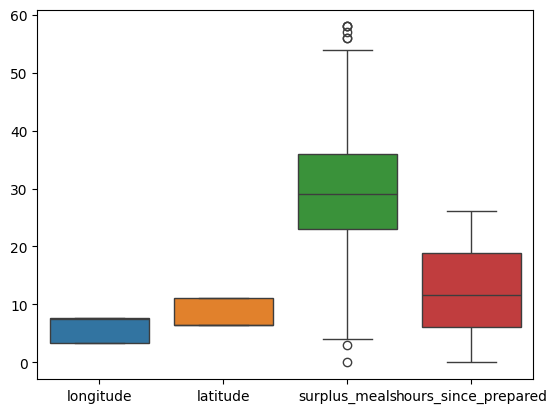

In [14]:
#check outlier
sns.boxplot(data = sme)
plt.show()

##### MODELING

##### Using Logistic Regression

In [15]:
#import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

columns needed for our model: hours_since_prepared, storage_type, food_status

In [16]:
#subset the sme data to retrive the required column for the models
SME = sme[['food_status', 'hours_since_prepared', 'storage_type']]
SME

,food_status,hours_since_prepared,storage_type
0,Moderate,4.496714,Room Temperature
1,Moderate,7.861736,Room Temperature
2,Moderate,11.647689,Refrigerated
3,Moderate,16.523030,Refrigerated
4,Spoiled,23.765847,Refrigerated
...,...,...,...
895,Moderate,2.648710,Room Temperature
896,Spoiled,22.832882,Refrigerated
897,Spoiled,24.146714,Room Temperature
898,Fresh,8.206509,Refrigerated


In [17]:
#define the features (X) and the target_variable
y = SME['food_status']  #target variable
y

0      Moderate
1      Moderate
2      Moderate
3      Moderate
4       Spoiled
         ...   
895    Moderate
896     Spoiled
897     Spoiled
898       Fresh
899     Spoiled
Name: food_status, Length: 900, dtype: object

In [18]:
X = SME.drop('food_status', axis = 1)   #features
X

,hours_since_prepared,storage_type
0,4.496714,Room Temperature
1,7.861736,Room Temperature
2,11.647689,Refrigerated
3,16.523030,Refrigerated
4,23.765847,Refrigerated
...,...,...
895,2.648710,Room Temperature
896,22.832882,Refrigerated
897,24.146714,Room Temperature
898,8.206509,Refrigerated


In [19]:
#split the X features into numeric and categorical
num = ['hours_since_prepared']
cat = ['storage_type']

In [20]:
#encode the categorical column in the features (X)
#create a preprocessing tranformer

preprocess = ColumnTransformer(transformers=[
    ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore', dtype=int), cat)], 
                               remainder='passthrough')

In [21]:
#create a pipeline to connect the preprocessor and the model
pipeline = Pipeline(steps = [
    ('preprocessing', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])

In [22]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
#train the model
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('categorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [24]:
y_test

561       Fresh
317    Moderate
842    Moderate
95      Spoiled
289       Fresh
         ...   
849       Fresh
202    Moderate
365     Spoiled
739     Spoiled
149     Spoiled
Name: food_status, Length: 180, dtype: object

In [25]:
#test the model
y_pred = pipeline.predict(X_test)
y_pred

array(['Fresh', np.str_('Moderate'), np.str_('Moderate'),
       np.str_('Spoiled'), 'Fresh', 'Fresh', np.str_('Moderate'),
       np.str_('Moderate'), np.str_('Moderate'), np.str_('Moderate'),
       np.str_('Moderate'), 'Fresh', 'Fresh', 'Fresh',
       np.str_('Moderate'), 'Fresh', np.str_('Spoiled'),
       np.str_('Spoiled'), 'Fresh', np.str_('Spoiled'), 'Fresh', 'Fresh',
       np.str_('Moderate'), np.str_('Spoiled'), np.str_('Moderate'),
       np.str_('Moderate'), np.str_('Moderate'), np.str_('Moderate'),
       np.str_('Spoiled'), np.str_('Moderate'), np.str_('Moderate'),
       'Fresh', np.str_('Spoiled'), np.str_('Moderate'),
       np.str_('Moderate'), 'Fresh', np.str_('Spoiled'),
       np.str_('Moderate'), np.str_('Moderate'), np.str_('Moderate'),
       np.str_('Spoiled'), np.str_('Spoiled'), np.str_('Spoiled'),
       np.str_('Spoiled'), np.str_('Moderate'), 'Fresh', 'Fresh',
       np.str_('Moderate'), np.str_('Moderate'), np.str_('Moderate'),
       np.str_('Moderate'

In [26]:
#evaluation; check accuracy
print('Model_accuracy:', accuracy_score(y_test, y_pred))

Model_accuracy: 0.8611111111111112


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fresh       0.78      0.93      0.85        42
    Moderate       0.94      0.84      0.89        90
     Spoiled       0.82      0.83      0.82        48

    accuracy                           0.86       180
   macro avg       0.84      0.87      0.85       180
weighted avg       0.87      0.86      0.86       180



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[39,  2,  1],
       [ 6, 76,  8],
       [ 5,  3, 40]])

In [29]:
cross_score = cross_val_score(pipeline, X, y, cv=5)
print('cross_validation scores:', cross_score)
print('Mean cross scores accuracy:', cross_score.mean())

cross_validation scores: [0.89444444 0.86111111 0.82777778 0.83888889 0.88888889]
Mean cross scores accuracy: 0.8622222222222222


##### MODEL TESTING

In [30]:
trial =pd.DataFrame({'hours_since_prepared': [8.84], 'storage_type': ['Room Temperature']})
prediction = pipeline.predict(trial)
prediction

array([np.str_('Moderate')], dtype=object)

In [31]:
import joblib

In [32]:
joblib.dump(pipeline, 'food_status_model.pkl')

['food_status_model.pkl']

In [ ]:
#test model
import joblib
import pandas as pd

model = joblib.load('food_status_model.pkl')
sample = pd.DataFrame({
    'hours_since_prepared': [20.00],
    'storage_type': ['Refrigerated']
})
model.predict(sample)

array([np.str_('Spoiled')], dtype=object)

In [1]:
from food_safety_prediction import food_safety_model
food_safety_model(20.00, 'Room Temperature')

'Spoiled'